# PROJECT TITLE - FLIGHT PRICE PREDICTION
#### To go over this project, we'll use the Data_Train.xlsx, Test_set.xlsx 

- contains information about 12 Airlines (Date_of_Journey, Source, Destination, Route, Dep. Time, Arrival Time, etc.)
- we want to see if we can predict Flight Price 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns
%matplotlib inline
import os


In [2]:
os.getcwd()

'C:\\Users\\Lenove'

In [3]:
os.chdir('C:\\ProgramData\\Anaconda3\\Data Science\\Batch67 Day33\\Project 12 Flight Price Predict Heroku\\')
os.getcwd()

'C:\\ProgramData\\Anaconda3\\Data Science\\Batch67 Day33\\Project 12 Flight Price Predict Heroku'

### Let's read the train_data & do some Exploratory Data Analysis

In [4]:
df = pd.read_excel('Data_Train.xlsx')
display(df)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### Automated Exploratory Data Analysis

In [5]:
#Pandas Profiling Report 

import pandas_profiling as pf
display(pf.ProfileReport(df))

C:\Users\Lenove\AppData\Local\Temp\ipykernel_22940\4062757110.py:3: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Manual Exploratory Data Analysis

In [6]:
# Number of records
len(df)

10683

In [7]:
# Number of Records
display (df.shape)

(10683, 11)

In [8]:
# checking the data type
display (df.dtypes)

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
# checking null value
display (df.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
# Remove the NaN values (records) from the dataset
df.dropna(how = 'any',inplace = True)
display(df.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
# Display Number of records- Number of records reduced by 1 , since we removed null record
display(df.shape)

(10682, 11)

In [12]:
# Display First 5 records
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Feature Engineering

In [13]:
#Split Date of Journey column to Day and Month 
# Convert Date_of_Journey to its appropriate format as datetime with regards to day and month. Added two additional columns Day and Month
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey']) # Chanage Data type- from Object to Date and Time
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day # Day column 
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month # Month Column 
display(df)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/04/2019' in DD/MM/YYYY format. Pro

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1


In [14]:
# Drop the column Date_of_Journey
df.drop(['Date_of_Journey'],axis = 1,inplace = True)
display(df.head())

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [15]:
# Convert datetime & split Dep_Time column to hour & minute
df['Dep_hr'] = pd.to_datetime(df['Dep_Time']).dt.hour    # Hour column
df['Dep_min']= pd.to_datetime(df['Dep_Time']).dt.minute  # Minute column
display(df.head())

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [16]:
display(df.dtypes)

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price                int64
Day_of_Journey       int64
Month_of_Journey     int64
Dep_hr               int64
Dep_min              int64
dtype: object

In [17]:
# Drop the column Dep_Time
df.drop(['Dep_Time'],axis= 1,inplace= True)
display(df.head())

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [18]:
# Convert to datetime and split Arrival_Time to hour & minute
df['Arrival_hr']= pd.to_datetime(df['Arrival_Time']).dt.hour       # Hour Column
df['Arrival_min']= pd.to_datetime(df['Arrival_Time']).dt.minute    # Minute Column
display(df.head())

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [19]:
# Drop the column Arrival_Time
df.drop(['Arrival_Time'],axis= 1,inplace = True)
display(df.head())

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [20]:
display(df.dtypes)

Airline             object
Source              object
Destination         object
Route               object
Duration            object
Total_Stops         object
Additional_Info     object
Price                int64
Day_of_Journey       int64
Month_of_Journey     int64
Dep_hr               int64
Dep_min              int64
Arrival_hr           int64
Arrival_min          int64
dtype: object

In [21]:
display(df['Duration'])

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [22]:
'''
split duration datapoints based on space ' '

expand : bool, default False

Expand the splitted strings into separate columns.

If True, return DataFrame/MultiIndex expanding dimensionality.
If False, return Series/Index, containing lists of strings.
'''

duration = (df['Duration'].str.split(' ',expand = True))
display(duration)

,0,1
0,2h,50m
1,7h,25m
2,19h,None
3,5h,25m
4,4h,45m
...,...,...
10678,2h,30m
10679,2h,35m
10680,3h,None
10681,2h,40m


In [23]:
# in column 1 that is minute column fill all Null values with '00m'
duration[1].fillna('00m',inplace = True)
display(duration)

,0,1
0,2h,50m
1,7h,25m
2,19h,00m
3,5h,25m
4,4h,45m
...,...,...
10678,2h,30m
10679,2h,35m
10680,3h,00m
10681,2h,40m


In [24]:
#Extract the hours ie 0th column by excluding last character h x[:-1]
#select the item at index 0 and leave the last one (in this case the 'h')
df['duration_hr']= duration[0].apply (lambda x: x[:-1])
display(df['duration_hr'])

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: duration_hr, Length: 10682, dtype: object

In [25]:
#Extract the minutes, select the item at index 1 and leave the last one (in this case the 'm')
df['duration_min']= duration[1].apply(lambda x: x[:-1])
display(df['duration_min'])

0        50
1        25
2        00
3        25
4        45
         ..
10678    30
10679    35
10680    00
10681    40
10682    20
Name: duration_min, Length: 10682, dtype: object

In [26]:
# Drop the column Duration
df.drop(['Duration'],axis=1,inplace= True)
display(df)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,00
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,11,30,14,10,2,40


In [27]:
# Config file
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

In [28]:
# count of airlines
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [29]:
Airprices= df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
display(Airprices)

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9612.427756
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Trujet                                4140.000000
Name: Price, dtype: float64

### Airline VS Average Price
- Display using Bar Plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show(close=None, block=None)>

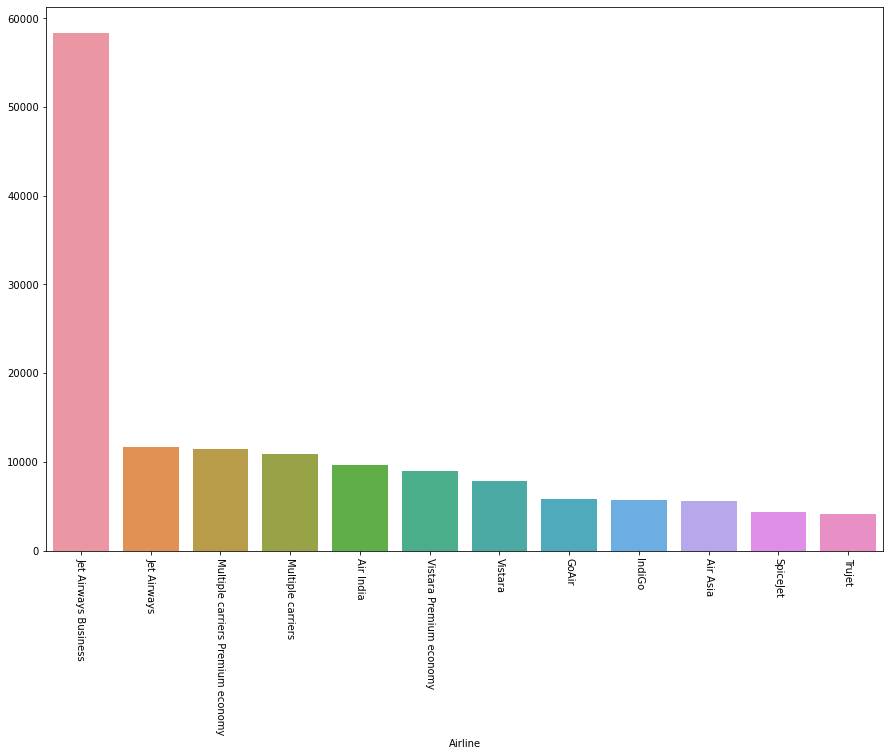

In [30]:
#Jet Airways Business has the highest price with Trujet having the lowest
Airprices= df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation=270)
plt.show

- Display Airline vs Average Price using Box Plot

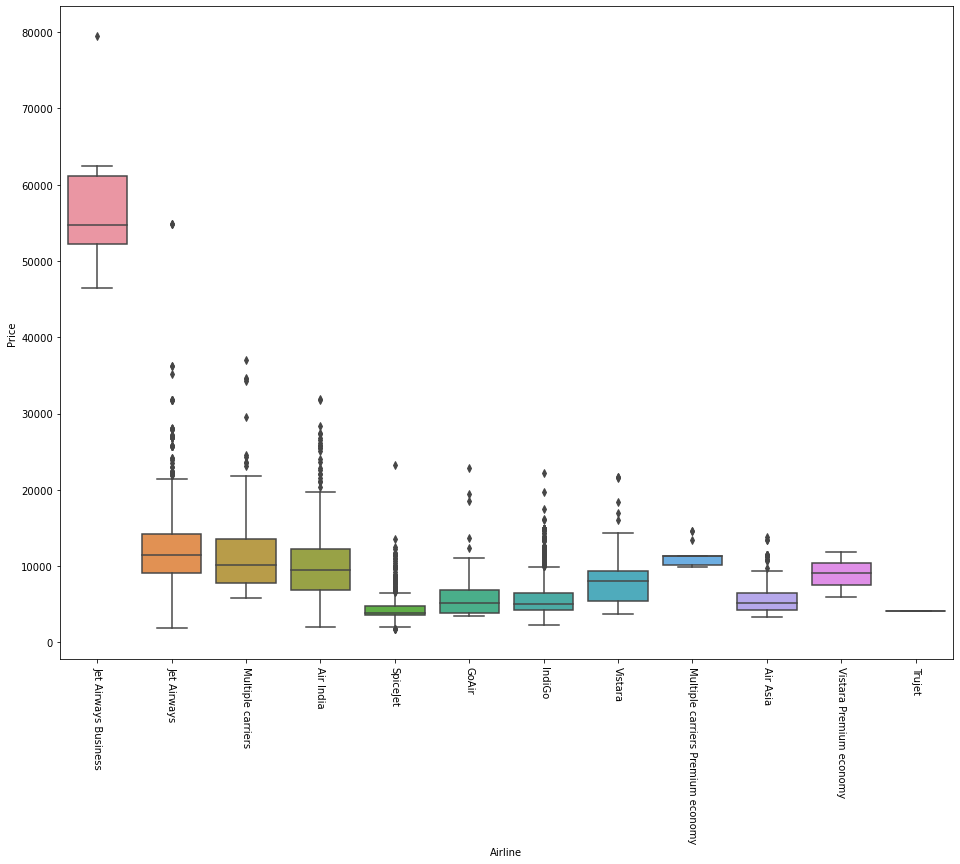

In [31]:
# Box Plot Airline VS Price
plt.figure(figsize=(16,12))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending= False))
plt.xticks(rotation=270)
plt.show()

### Price based on number of stops

In [32]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

<function matplotlib.pyplot.show(close=None, block=None)>

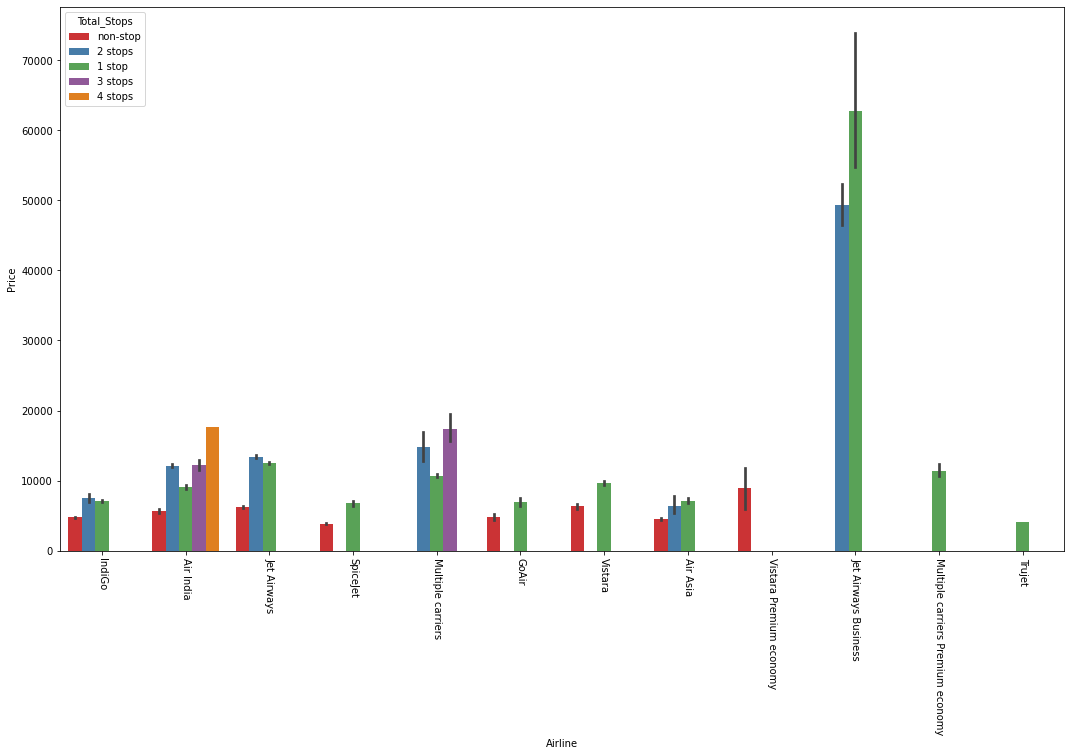

In [33]:
# Bar Plot - Same Details as chart 
# One stop and two stops Jet Airways Business is having the highest price

plt.figure(figsize=(18,10))
ax= sns.barplot(x=df['Airline'],y= df['Price'],hue = df['Total_Stops'],palette= 'Set1')
ax.set_xticklabels(ax.get_xticklabels(),rotation=270)
plt.show

### Number of flights from different Airports

In [34]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

### Source vs Price

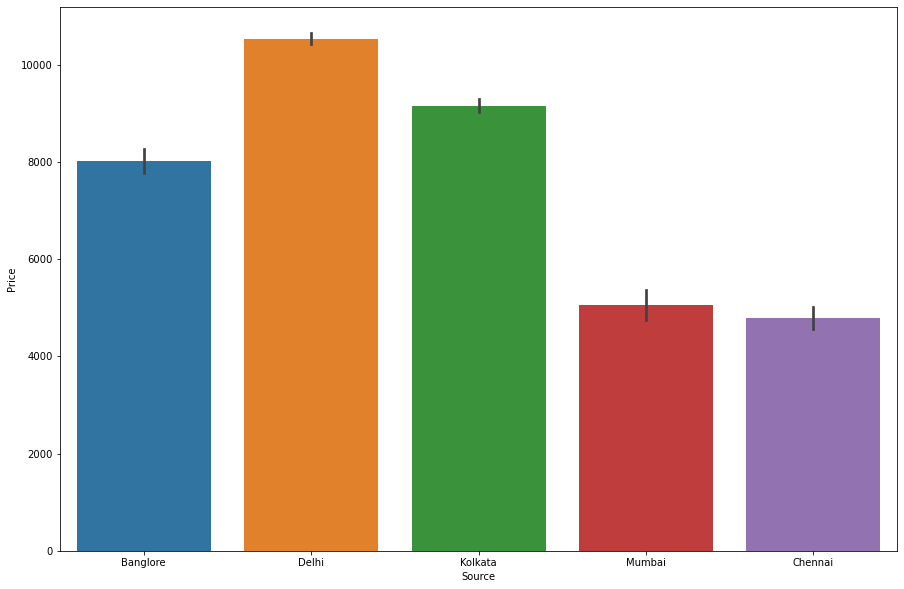

In [35]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source', data=df.sort_values('Price',ascending=False))
plt.show()

In [36]:
# Flights in the destination
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

### Destination vs Price

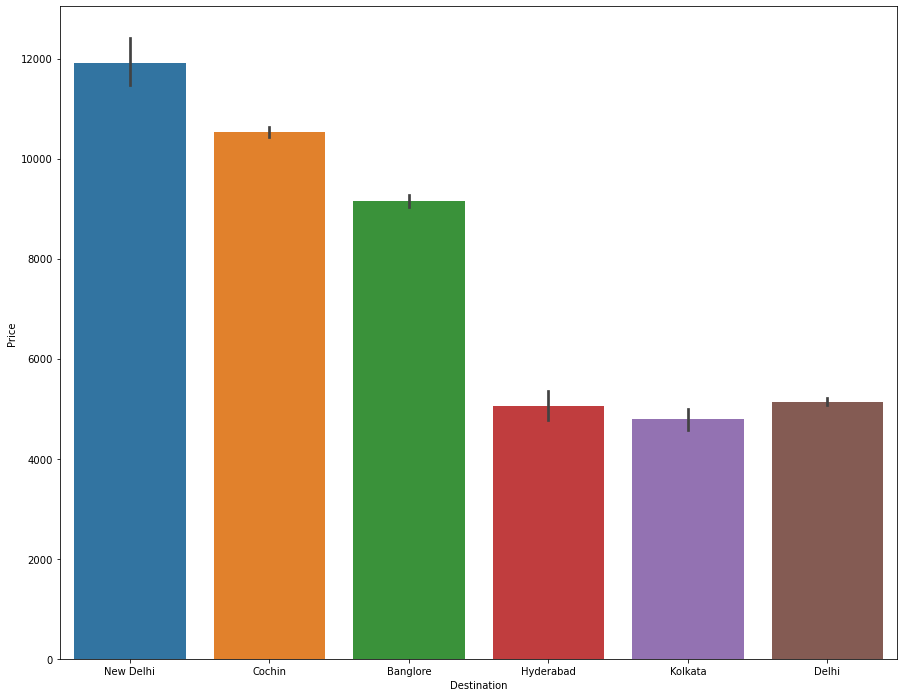

In [37]:
plt.figure(figsize=(15,12))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

In [38]:
# There is New Delhi and Delhi in the data set, replace New Delhi with Delhi

for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

### Display unique destination

In [39]:
display(df['Destination'].unique())

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

### Number of flights from different Airports

In [40]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

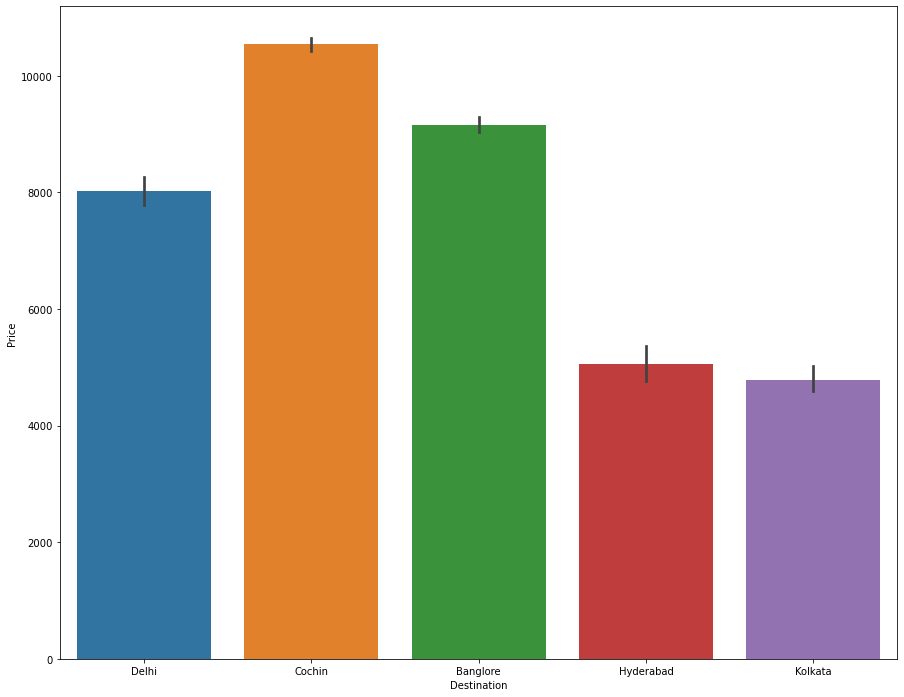

In [41]:
# Create Bar Plot again with Price 
plt.figure(figsize=(15,12))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

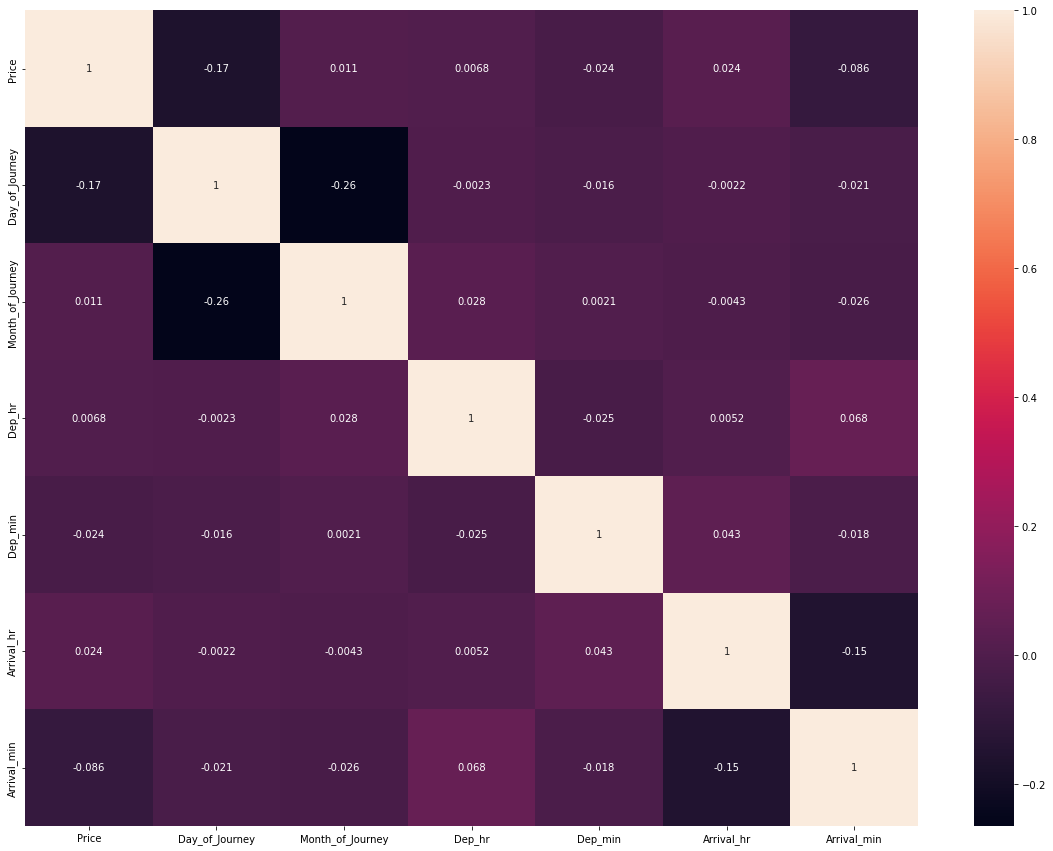

In [42]:
# Create Heat Map
#The features are less correlated which is a good thing for us to avoid Multicollinearity

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [43]:
display(df.head(4))

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25


### Label Encoding to column 'Total_Stops'

In [44]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
display (df.head(4))

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,18,5,23,30,5,25


### One Hot Encoding -Column "Airline"- Due to drop_first, there is no column for Air Asia

In [45]:
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
display (air_dummy)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


### One hot encoding for columns 'Source','Destination' Due to drop first Source Cochin column Dropped 

In [46]:
#One hot encoding for columns 'Source','Destination' Due to drop first Source Cochin column Dropped 
source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
display (source_dest_dummy)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
10678,0,0,1,0,0,0,0,0
10679,0,0,1,0,0,0,0,0
10680,0,0,0,0,0,1,0,0
10681,0,0,0,0,0,1,0,0


### Concatenate Label Encoded and one hot encoded columns into main data frame

In [47]:
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)
display (df.head(4))

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25


### Drop Columns -Already Label Encoded or One Hot Encoded  

In [48]:
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [49]:
display (df.shape)

(10682, 31)

### Let's read the Test_dataset

In [50]:
df_test=pd.read_excel("Test_set.xlsx")
display(df_test)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [51]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '21/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '15/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '18/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '21/03/2019' in DD/MM/YYYY format. Pro

In [52]:
# Drop additional Columns
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)
display (df_test.head(4))

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,...,Destination_New Delhi,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,dur_hr,dur_min
0,0,0,0,1,0,0,0,0,0,0,...,0,1,6,6,17,30,4,25,10,55
1,0,0,1,0,0,0,0,0,0,0,...,0,1,5,12,6,20,10,20,4,00
2,0,0,0,1,0,0,0,0,0,0,...,0,1,21,5,19,15,19,0,23,45
3,0,0,0,0,0,1,0,0,0,0,...,0,1,21,5,8,0,21,0,13,00


In [53]:
print('train_shape',df.shape)
# Additional columns in training data set  'Route', 'Price','Additional_Info', can be removed later 
print('test_shape',df_test.shape)

train_shape (10682, 31)
test_shape (2671, 28)


### Create X and Y from Training Data 

In [54]:
x=df.drop(['Route', 'Price','Additional_Info'],axis=1)
y=df['Price']

In [55]:
display (x.head(3))

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,6,9,9,25,4,25,19,00


### Create Model using ExtraTreesRegressor

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)

ExtraTreesRegressor()

### Predict and Print Accuracy using r2_score

In [57]:
y_predict=ET_Model.predict(x)
display (r2_score(y,y_predict))

0.963310554165011

### Feature Importance Graph

<AxesSubplot:>

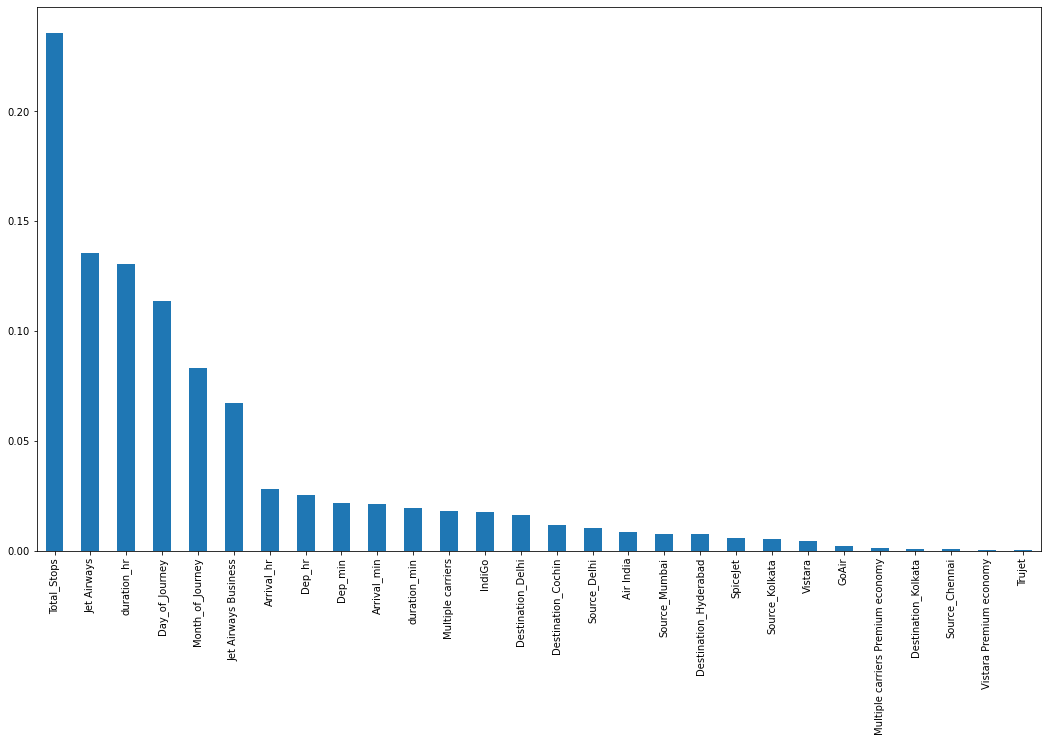

In [58]:
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

### Splitting the dataset using train_test_split

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

### Preparing Extra Tree Regression with Training Data 

In [60]:
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)

ExtraTreesRegressor(n_estimators=120)

### Prediction and Print Accuracy using r2_score

In [61]:
y_predict=ET_Model.predict(X_test)
from sklearn.metrics import r2_score
display (r2_score(y_test,y_predict))

0.7665031630055724

### Creating model with the help of Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.7915748590636291

### Hyperparameter Tuning and RandomizedSearchCV - Model used - RandomForestRegressor

In [63]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=3,random_state=42, n_jobs = 1)


### Fiting the Model

In [64]:
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [65]:
# Prediction 
rf_pred=rCV.predict(X_test)
display (rf_pred)

array([12518.53829742,  4289.98449817,  6137.39427461, ...,
       11579.66550253,  9723.00107499,  8664.49335997])

### mean_absolute_error and mean_squared_error

In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1157.0555973031383
MSE 3956286.5585434884


In [67]:
# Display Accuracy
display (r2_score(y_test,rf_pred))

0.807326916612735

### Creating Model CatBoostRegressor

In [68]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.057463
0:	learn: 4465.7280757	total: 180ms	remaining: 2m 59s
1:	learn: 4317.7245126	total: 189ms	remaining: 1m 34s
2:	learn: 4167.9871081	total: 198ms	remaining: 1m 5s
3:	learn: 4030.4839609	total: 212ms	remaining: 52.7s
4:	learn: 3906.4844760	total: 225ms	remaining: 44.7s
5:	learn: 3785.4580402	total: 230ms	remaining: 38s
6:	learn: 3673.8662552	total: 241ms	remaining: 34.2s
7:	learn: 3582.0533069	total: 250ms	remaining: 31s
8:	learn: 3495.5629367	total: 260ms	remaining: 28.6s
9:	learn: 3404.7478335	total: 287ms	remaining: 28.4s
10:	learn: 3325.1004431	total: 293ms	remaining: 26.4s
11:	learn: 3254.1004651	total: 300ms	remaining: 24.7s
12:	learn: 3184.6084064	total: 308ms	remaining: 23.4s
13:	learn: 3122.3064005	total: 325ms	remaining: 22.9s
14:	learn: 3067.6550706	total: 337ms	remaining: 22.1s
15:	learn: 3014.5169632	total: 352ms	remaining: 21.7s
16:	learn: 2962.4252595	total: 360ms	remaining: 20.8s
17:	learn: 2920.1931240	total: 370ms	remaining: 20.2s
18:	learn:

169:	learn: 1929.4656497	total: 1.61s	remaining: 7.88s
170:	learn: 1927.7647084	total: 1.62s	remaining: 7.86s
171:	learn: 1926.5870153	total: 1.63s	remaining: 7.83s
172:	learn: 1925.5010876	total: 1.73s	remaining: 8.26s
173:	learn: 1924.0349513	total: 1.73s	remaining: 8.22s
174:	learn: 1921.8799425	total: 1.74s	remaining: 8.19s
175:	learn: 1919.9229413	total: 1.74s	remaining: 8.16s
176:	learn: 1919.0135109	total: 1.75s	remaining: 8.13s
177:	learn: 1917.0102157	total: 1.75s	remaining: 8.1s
178:	learn: 1914.5686236	total: 1.76s	remaining: 8.06s
179:	learn: 1912.4008242	total: 1.76s	remaining: 8.03s
180:	learn: 1909.3596736	total: 1.77s	remaining: 8s
181:	learn: 1906.4143993	total: 1.77s	remaining: 7.97s
182:	learn: 1905.0535079	total: 1.78s	remaining: 7.94s
183:	learn: 1902.8146373	total: 1.78s	remaining: 7.91s
184:	learn: 1901.7193607	total: 1.79s	remaining: 7.89s
185:	learn: 1899.7272699	total: 1.8s	remaining: 7.88s
186:	learn: 1898.5304244	total: 1.81s	remaining: 7.86s
187:	learn: 189

347:	learn: 1719.7146510	total: 2.74s	remaining: 5.13s
348:	learn: 1719.7013755	total: 2.74s	remaining: 5.12s
349:	learn: 1717.9139412	total: 2.75s	remaining: 5.1s
350:	learn: 1716.6319333	total: 2.75s	remaining: 5.09s
351:	learn: 1715.3656102	total: 2.76s	remaining: 5.08s
352:	learn: 1714.1619117	total: 2.76s	remaining: 5.06s
353:	learn: 1713.1035883	total: 2.77s	remaining: 5.05s
354:	learn: 1712.4061526	total: 2.81s	remaining: 5.1s
355:	learn: 1710.1710065	total: 2.81s	remaining: 5.09s
356:	learn: 1709.0674602	total: 2.82s	remaining: 5.08s
357:	learn: 1707.7016278	total: 2.83s	remaining: 5.07s
358:	learn: 1707.0025113	total: 2.83s	remaining: 5.06s
359:	learn: 1706.1628396	total: 2.84s	remaining: 5.05s
360:	learn: 1706.1471778	total: 2.86s	remaining: 5.06s
361:	learn: 1705.1177194	total: 2.86s	remaining: 5.04s
362:	learn: 1705.0967421	total: 2.87s	remaining: 5.03s
363:	learn: 1704.4432779	total: 2.87s	remaining: 5.02s
364:	learn: 1704.4307330	total: 2.88s	remaining: 5s
365:	learn: 170

523:	learn: 1593.2990136	total: 3.63s	remaining: 3.29s
524:	learn: 1593.2937802	total: 3.63s	remaining: 3.29s
525:	learn: 1592.4805278	total: 3.64s	remaining: 3.28s
526:	learn: 1591.3318756	total: 3.65s	remaining: 3.28s
527:	learn: 1590.7243695	total: 3.66s	remaining: 3.27s
528:	learn: 1590.6774548	total: 3.66s	remaining: 3.26s
529:	learn: 1590.2788358	total: 3.67s	remaining: 3.25s
530:	learn: 1589.4259231	total: 3.67s	remaining: 3.24s
531:	learn: 1588.7541581	total: 3.68s	remaining: 3.24s
532:	learn: 1588.7451407	total: 3.68s	remaining: 3.23s
533:	learn: 1588.1264081	total: 3.69s	remaining: 3.22s
534:	learn: 1587.4387665	total: 3.69s	remaining: 3.21s
535:	learn: 1586.7819922	total: 3.7s	remaining: 3.2s
536:	learn: 1585.9054589	total: 3.71s	remaining: 3.19s
537:	learn: 1585.1963465	total: 3.71s	remaining: 3.19s
538:	learn: 1584.4392699	total: 3.72s	remaining: 3.18s
539:	learn: 1583.7659773	total: 3.72s	remaining: 3.17s
540:	learn: 1583.0103901	total: 3.73s	remaining: 3.16s
541:	learn: 

715:	learn: 1496.5960033	total: 4.51s	remaining: 1.79s
716:	learn: 1496.3579503	total: 4.51s	remaining: 1.78s
717:	learn: 1495.9380334	total: 4.52s	remaining: 1.77s
718:	learn: 1495.6767789	total: 4.52s	remaining: 1.77s
719:	learn: 1494.9828119	total: 4.53s	remaining: 1.76s
720:	learn: 1494.6367972	total: 4.53s	remaining: 1.75s
721:	learn: 1493.9308821	total: 4.54s	remaining: 1.75s
722:	learn: 1493.4155117	total: 4.54s	remaining: 1.74s
723:	learn: 1492.8999298	total: 4.55s	remaining: 1.73s
724:	learn: 1492.5529815	total: 4.55s	remaining: 1.73s
725:	learn: 1492.5503532	total: 4.56s	remaining: 1.72s
726:	learn: 1491.9711517	total: 4.57s	remaining: 1.71s
727:	learn: 1491.7256780	total: 4.57s	remaining: 1.71s
728:	learn: 1491.2995945	total: 4.58s	remaining: 1.7s
729:	learn: 1490.7823761	total: 4.58s	remaining: 1.69s
730:	learn: 1490.6915808	total: 4.59s	remaining: 1.69s
731:	learn: 1490.2825795	total: 4.59s	remaining: 1.68s
732:	learn: 1489.8096143	total: 4.59s	remaining: 1.67s
733:	learn:

876:	learn: 1440.1888814	total: 5.21s	remaining: 731ms
877:	learn: 1439.8345050	total: 5.21s	remaining: 725ms
878:	learn: 1439.4806511	total: 5.22s	remaining: 718ms
879:	learn: 1439.2028904	total: 5.22s	remaining: 712ms
880:	learn: 1438.7472496	total: 5.23s	remaining: 706ms
881:	learn: 1438.5670982	total: 5.23s	remaining: 700ms
882:	learn: 1438.5641485	total: 5.23s	remaining: 694ms
883:	learn: 1437.9403800	total: 5.24s	remaining: 687ms
884:	learn: 1437.5493199	total: 5.24s	remaining: 681ms
885:	learn: 1436.9101397	total: 5.25s	remaining: 675ms
886:	learn: 1436.3980361	total: 5.25s	remaining: 669ms
887:	learn: 1436.0231152	total: 5.25s	remaining: 663ms
888:	learn: 1435.5457145	total: 5.26s	remaining: 657ms
889:	learn: 1435.2861676	total: 5.26s	remaining: 650ms
890:	learn: 1435.2842827	total: 5.26s	remaining: 644ms
891:	learn: 1434.9485688	total: 5.27s	remaining: 638ms
892:	learn: 1434.4647108	total: 5.27s	remaining: 632ms
893:	learn: 1434.0763276	total: 5.28s	remaining: 626ms
894:	learn

### Cat Boost Prediction

In [69]:
cat_pred=cat.predict(X_test)
display (cat_pred)

array([12502.97869633,  3913.57282693,  5936.5002272 , ...,
       11479.15026652, 10037.36579669,  8301.20092775])

### Cat Boost Accuracy

In [70]:
display (r2_score(y_test,cat_pred))

0.8273858089678572

### Changing the data type for Light GBM Regressor - Convert to Integer 

In [71]:
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

### Creating Model LGBMRegressor

In [72]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

LGBMRegressor()

### Prediction and accuracy 

In [73]:
lgb_pred=lgb_model.predict(X_test)
display (r2_score(y_test,lgb_pred))

0.8030064936005559

In [74]:
# Display top 5 records
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


### Using pickle to save our model so that we can use it later

In [75]:
import pickle 
# Saving model to disk
pickle.dump(cat, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

### Displaying all column names

In [76]:
display (df.columns)

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

### Creating the data set for deployment by removing columns Route and Additional_Info

In [77]:
deploy_df=df.drop(['Route','Additional_Info'],axis=1)

### Generating the .csv file and display the data set 

In [78]:
deploy_df.to_csv('deploy_df.csv')
display (deploy_df)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,2,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,2,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,1,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,1,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,0,4107,4,9,19,55,22,25,2,30
10679,1,0,0,0,0,0,0,0,0,0,...,0,4145,27,4,20,45,23,20,2,35
10680,0,0,0,1,0,0,0,0,0,0,...,0,7229,27,4,8,20,11,20,3,00
10681,0,0,0,0,0,0,0,0,0,1,...,0,12648,3,1,11,30,14,10,2,40
